In [50]:
import cv2
import matplotlib.pyplot as plt
import shutil

In [2]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Error loading image: {img_path}")

    return images

In [3]:
dataset_folder = '../Final_project/Dataset/train/'  
images = load_images_from_folder(dataset_folder)

print(f"Number of images loaded: {len(images)}")

Error loading image: ../Final_project/Dataset/train/_annotations.coco.json
Number of images loaded: 1502


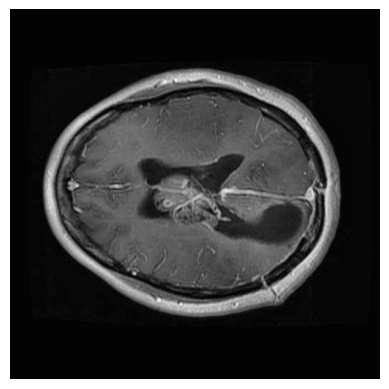

In [4]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [5]:
def separate_images(source_dir, target_dir):
  
    os.makedirs(target_dir, exist_ok=True)

    # Loop through all files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(('.jpg')): 
           
            source_file = os.path.join(source_dir, filename)
            target_file = os.path.join(target_dir, filename)
            # Move the image file to the target directory
            shutil.move(source_file, target_file)
            print(f"Moved: {filename}")

source_dir = "../Final_project/Dataset/train" 
target_dir = "dataset/train/images" 

separate_images(source_dir, target_dir)


Moved: 2371_jpg.rf.be40d9323107d2a9cd76e24b7263ad18.jpg
Moved: 2103_jpg.rf.07de1b8d799bb3c67ce5d612b63437c0.jpg
Moved: 2842_jpg.rf.efa0c72cda7c8948aea33e213960bdfd.jpg
Moved: 20_jpg.rf.0ffd20347cd1deed90b4ec6558c17e2e.jpg
Moved: 2054_jpg.rf.fd6bb19aa8d1fa7647d747f0346e7212.jpg
Moved: 2438_jpg.rf.c8680b1f01f2d004ad9ff5647fc6f49a.jpg
Moved: 2753_jpg.rf.678c4cb794859bc06c4ae83bfa68600d.jpg
Moved: 2088_jpg.rf.8971c8739229c7e7e2ef30da5d453007.jpg
Moved: 2738_jpg.rf.da005f2f717e3b79e449e4834114a3a4.jpg
Moved: 2047_jpg.rf.4c0ace4361217d7322ec32e1a7bdaa84.jpg
Moved: 2644_jpg.rf.1fcbbbd02e4742c9ea5819306f3e1047.jpg
Moved: 1005_jpg.rf.26a35018e228afa0f075d4a09fd8769b.jpg
Moved: 1270_jpg.rf.659b47d4b89fe932ca809651e5611f69.jpg
Moved: 1506_jpg.rf.788e4c020b4d7032ae6f053536613bb9.jpg
Moved: 1259_jpg.rf.0e037d3a36df4b7a8366a0772c46b1f8.jpg
Moved: 2060_jpg.rf.5b38d0ebd5bf2cb3e43301ee15329d1a.jpg
Moved: 1084_jpg.rf.c86a8e86898d5c9a027b1039ffae819e.jpg
Moved: 1917_jpg.rf.575164257149e23676f8e41f81699f2

> Converting coco format to yolo

In [6]:
import json
import os

def convert_coco_to_yolo(coco_file, img_dir, output_dir):
    with open(coco_file) as f:
        data = json.load(f)
    
    images = {img['id']: img for img in data['images']}
    annotations = data['annotations']

    for ann in annotations:
        img_id = ann['image_id']
        img_info = images[img_id]
        img_name = img_info['file_name']
        img_path = os.path.join(img_dir, img_name)

        bbox = ann['bbox']
        x_center = (bbox[0] + bbox[2] / 2) / img_info['width']
        y_center = (bbox[1] + bbox[3] / 2) / img_info['height']
        width = bbox[2] / img_info['width']
        height = bbox[3] / img_info['height']

        class_id = 1 if ann['category_id'] == 1 else 0  # 1 is tumor and 0 is non-tumor

        yolo_annotation = f"{class_id} {x_center} {y_center} {width} {height}\n"
        output_path = os.path.join(output_dir, f"{os.path.splitext(img_name)[0]}.txt")

        with open(output_path, "a") as f:
            f.write(yolo_annotation)


coco_file = "../Final_project/Dataset/train/_annotations.coco.json"  # Path to COCO annotation file
img_dir = "dataset/train/images"  # Path to images
output_dir = "dataset/train/labels"  # Path to save YOLO annotations
os.makedirs(output_dir, exist_ok=True)

convert_coco_to_yolo(coco_file, img_dir, output_dir)


In [7]:
def count_annotation_files(directory, extension='.txt'):
    count = 0

    # Iterate through all files in the directory
    for file in os.listdir(directory):
        if file.endswith(extension):
            count += 1
    
    return count

labels_dir = "../Final_project/Dataset/train/labels"  # Path toYOLO annotations

# Count the number of annotation files
num_annotations = count_annotation_files(labels_dir)

print(f"Number of annotation files: {num_annotations}")


Number of annotation files: 1501


In [8]:
def map_images_to_annotations(img_dir, labels_dir):
    mapping = {}

    # Iterate through all image files in the image directory
    for img_file in os.listdir(img_dir):
        if img_file.endswith(('.jpg')): 
            base_name = os.path.splitext(img_file)[0]
            img_path = os.path.join(img_dir, img_file)
            annotation_path = os.path.join(labels_dir, base_name + '.txt')

            if os.path.exists(annotation_path):
                mapping[img_path] = annotation_path
            else:
                print(f"Annotation file for {img_file} not found!")

    return mapping


In [9]:
img_dir = "../Final_project/Dataset/train/images"  # Path to images
labels_dir = "../Final_project/Dataset/train/labels"  # Path to  YOLO annotations

mapping = map_images_to_annotations(img_dir, labels_dir)

# Print the mapping
for img_path, annotation_path in mapping.items():
    print(f"Image: {img_path} -> Annotation: {annotation_path}")

Annotation file for 2369_jpg.rf.8b8afa9d79c61fa42ca128c940b9cbc0.jpg not found!
Image: ../Final_project/Dataset/train/images/2371_jpg.rf.be40d9323107d2a9cd76e24b7263ad18.jpg -> Annotation: ../Final_project/Dataset/train/labels/2371_jpg.rf.be40d9323107d2a9cd76e24b7263ad18.txt
Image: ../Final_project/Dataset/train/images/2103_jpg.rf.07de1b8d799bb3c67ce5d612b63437c0.jpg -> Annotation: ../Final_project/Dataset/train/labels/2103_jpg.rf.07de1b8d799bb3c67ce5d612b63437c0.txt
Image: ../Final_project/Dataset/train/images/2842_jpg.rf.efa0c72cda7c8948aea33e213960bdfd.jpg -> Annotation: ../Final_project/Dataset/train/labels/2842_jpg.rf.efa0c72cda7c8948aea33e213960bdfd.txt
Image: ../Final_project/Dataset/train/images/20_jpg.rf.0ffd20347cd1deed90b4ec6558c17e2e.jpg -> Annotation: ../Final_project/Dataset/train/labels/20_jpg.rf.0ffd20347cd1deed90b4ec6558c17e2e.txt
Image: ../Final_project/Dataset/train/images/2054_jpg.rf.fd6bb19aa8d1fa7647d747f0346e7212.jpg -> Annotation: ../Final_project/Dataset/train/

> Since one annotation file for image 2369_jpg.rf.8b8afa9d79c61fa42ca128c940b9cbc0.jpg was missing. Looking at the picture, it can be seen that there is no presence of tumor so it was assigned to class 0(no tumor).

In [10]:
def create_annotation_file(annotation_file, class_id, x_center, y_center, width, height):
    with open(annotation_file, 'w') as f:
        line = f"{class_id} {x_center} {y_center} {width} {height}\n"
        f.write(line)

annotation_file = "../Final_project/Dataset/train/labels/2369_jpg.rf.8b8afa9d79c61fa42ca128c940b9cbc0.txt"
class_id = 0  # Assuming class 0 for  no tumor
x_center = 0.5
y_center = 0.5 
width = 0.2 
height = 0.3  

create_annotation_file(annotation_file, class_id, x_center, y_center, width, height)

### Similar process applies to validation and test test.

# Validation

In [11]:
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Error loading image: {img_path}")

    return images

In [12]:
valid_dataset_folder = '../Final_project/Dataset/valid/'  
images = load_images_from_folder(valid_dataset_folder)

print(f"Number of images loaded: {len(images)}")

Error loading image: ../Final_project/Dataset/valid/_annotations.coco.json
Number of images loaded: 429


In [13]:
def separate_images(source_dir, target_dir):

    os.makedirs(target_dir, exist_ok=True)

    # Loop through all files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(('.jpg')):  
            
            source_file = os.path.join(source_dir, filename)
            target_file = os.path.join(target_dir, filename)
            
            shutil.move(source_file, target_file)
            print(f"Moved: {filename}")

# Example usage
source_dir = "../Final_project/Dataset/valid" 
target_dir = "dataset/valid/images" 

separate_images(source_dir, target_dir)


Moved: 277_jpg.rf.a4616b8bc5fbc36bba3d01f97b8af7e9.jpg
Moved: 2067_jpg.rf.349fe4f457c83f371ee252497e08476b.jpg
Moved: 272_jpg.rf.92718f880f925316a693b483b3979bf0.jpg
Moved: 1119_jpg.rf.1a91f0a1d05cd3ade30b5c0ed9185020.jpg
Moved: 1023_jpg.rf.4dd95a6ac478364851bcefb7dd9b560c.jpg
Moved: 2390_jpg.rf.ce85a698e5fb33b61f9600367efed191.jpg
Moved: 1594_jpg.rf.10ce99d11cc02110e625509b46ebea03.jpg
Moved: 1447_jpg.rf.799aa120faf130350854605ec210c07f.jpg
Moved: 1815_jpg.rf.00620dbd616e966b9e02c97bdae89b28.jpg
Moved: 2240_jpg.rf.d1ccef86386f70ad1641cd32d63b8cfb.jpg
Moved: 1793_jpg.rf.544d8c87c54ead3d0ab3f9c75bc76eed.jpg
Moved: 2741_jpg.rf.664933debd3a457cdbfbd3f9ee8d0268.jpg
Moved: 179_jpg.rf.20611fb45e6fc335f2c6e05d884fb29a.jpg
Moved: 2150_jpg.rf.0f7ed111e311b2f61dff7d240e583811.jpg
Moved: 2794_jpg.rf.160f283cfa7092a30e9b3fec0d6e5a5d.jpg
Moved: 2091_jpg.rf.95766b99e2df6f8be58721e6988324c3.jpg
Moved: 1052_jpg.rf.959177d0e4941084149052a22b68028f.jpg
Moved: 2322_jpg.rf.9a444f44c998b2568c9f544ab8e67961

In [14]:
def convert_coco_to_yolo(coco_file, img_dir, output_dir):
    with open(coco_file) as f:
        data = json.load(f)
    
    images = {img['id']: img for img in data['images']}
    annotations = data['annotations']

    for ann in annotations:
        img_id = ann['image_id']
        img_info = images[img_id]
        img_name = img_info['file_name']
        img_path = os.path.join(img_dir, img_name)

        bbox = ann['bbox']
        x_center = (bbox[0] + bbox[2] / 2) / img_info['width']
        y_center = (bbox[1] + bbox[3] / 2) / img_info['height']
        width = bbox[2] / img_info['width']
        height = bbox[3] / img_info['height']

        class_id = 1 if ann['category_id'] == 1 else 0  # 1 is tumor and 0 is non-tumor

        yolo_annotation = f"{class_id} {x_center} {y_center} {width} {height}\n"
        output_path = os.path.join(output_dir, f"{os.path.splitext(img_name)[0]}.txt")

        with open(output_path, "a") as f:
            f.write(yolo_annotation)

# Example usage:
coco_file = "../Final_project/Dataset/valid/_annotations.coco.json"  # Path to COCO annotation file
img_dir = "dataset/valid/images"  # Path to images
output_dir = "dataset/valid/labels"  # Path to save YOLO annotations
os.makedirs(output_dir, exist_ok=True)

convert_coco_to_yolo(coco_file, img_dir, output_dir)


In [15]:
def count_annotation_files(directory, extension='.txt'):
    count = 0

    # Iterate through all files in the directory
    for file in os.listdir(directory):
        if file.endswith(extension):
            count += 1
    
    return count

labels_dir = "../Final_project/Dataset/valid/labels"  # Path to YOLO annotations

num_annotations = count_annotation_files(labels_dir)

print(f"Number of annotation files: {num_annotations}")


Number of annotation files: 429


* Here no annotation file is missing so we dont need to make one.

In [16]:
import os

def map_images_to_annotations(img_dir, labels_dir):
    mapping = {}

    # Iterate through all image files in the image directory
    for img_file in os.listdir(img_dir):
        if img_file.endswith(('.jpg')):  # Adjust extensions as needed
            base_name = os.path.splitext(img_file)[0]
            img_path = os.path.join(img_dir, img_file)
            annotation_path = os.path.join(labels_dir, base_name + '.txt')

            # Check if the corresponding annotation file exists
            if os.path.exists(annotation_path):
                mapping[img_path] = annotation_path
            else:
                print(f"Annotation file for {img_file} not found!")

    return mapping


In [17]:
img_dir = "../Final_project/Dataset/valid/images"  # Path to your images
labels_dir = "../Final_project/Dataset/valid/labels"  # Path to YOLO annotations

mapping = map_images_to_annotations(img_dir, labels_dir)

# Print the mapping
for img_path, annotation_path in mapping.items():
    print(f"Image: {img_path} -> Annotation: {annotation_path}")

Image: ../Final_project/Dataset/valid/images/277_jpg.rf.a4616b8bc5fbc36bba3d01f97b8af7e9.jpg -> Annotation: ../Final_project/Dataset/valid/labels/277_jpg.rf.a4616b8bc5fbc36bba3d01f97b8af7e9.txt
Image: ../Final_project/Dataset/valid/images/2067_jpg.rf.349fe4f457c83f371ee252497e08476b.jpg -> Annotation: ../Final_project/Dataset/valid/labels/2067_jpg.rf.349fe4f457c83f371ee252497e08476b.txt
Image: ../Final_project/Dataset/valid/images/272_jpg.rf.92718f880f925316a693b483b3979bf0.jpg -> Annotation: ../Final_project/Dataset/valid/labels/272_jpg.rf.92718f880f925316a693b483b3979bf0.txt
Image: ../Final_project/Dataset/valid/images/1119_jpg.rf.1a91f0a1d05cd3ade30b5c0ed9185020.jpg -> Annotation: ../Final_project/Dataset/valid/labels/1119_jpg.rf.1a91f0a1d05cd3ade30b5c0ed9185020.txt
Image: ../Final_project/Dataset/valid/images/1023_jpg.rf.4dd95a6ac478364851bcefb7dd9b560c.jpg -> Annotation: ../Final_project/Dataset/valid/labels/1023_jpg.rf.4dd95a6ac478364851bcefb7dd9b560c.txt
Image: ../Final_project/

# YOLOv8

In [44]:
from ultralytics import YOLO

train_data_yaml = "/Users/preethapallavi/Documents/EPITA S3/VideoAndImageProcessing/Final_project/Dataset/train/medical.yaml"
yolov8_weights = "../yolov8n.pt"

# Initialize the model
model = YOLO(yolov8_weights)

results = model.train(
    data=train_data_yaml,
    epochs=5,            
    imgsz=640,
    batch=8,             
    lrf=0.0005,           
    device="cpu",         
    augment=True,         # Enable data augmentation
    patience=10,          # Early stopping if no improvement
)

# Print
print(results)


Python(8150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Ultralytics YOLOv8.2.50 🚀 Python-3.12.0 torch-2.3.1 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=../yolov8n.pt, data=/Users/preethapallavi/Documents/EPITA S3/VideoAndImageProcessing/Final_project/Dataset/train/medical.yaml, epochs=5, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /Users/preethapallavi/Documents/EPITA S3/VideoAndImageProcessing/Final_project/Dataset/train/labels.cache... 1502 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1502/1502 [00:00<?, ?it/s]
val: Scanning /Users/preethapallavi/Documents/EPITA S3/VideoAndImageProcessing/Final_project/Dataset/valid/labels.cache... 429 images, 0 backgrounds, 0 corrupt: 100%|██████████| 429/429 [00:00<?, ?it/s]

Plotting labels to /Users/preethapallavi/runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/preethapallavi/runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.811      3.514      1.829          9        640: 100%|██████████| 188/188 [08:57<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [01:55<00:00,  4.29s/it]

                   all        429        429      0.463      0.444      0.411       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.666       2.53      1.729         11        640: 100%|██████████| 188/188 [08:39<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [01:56<00:00,  4.31s/it]

                   all        429        429      0.701      0.375       0.48       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G       1.68      2.167      1.713          8        640: 100%|██████████| 188/188 [08:06<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [01:53<00:00,  4.20s/it]

                   all        429        429      0.659      0.625      0.646      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.577      1.851      1.654         14        640: 100%|██████████| 188/188 [08:00<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [01:54<00:00,  4.25s/it]

                   all        429        429      0.714      0.626      0.708      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.521      1.659      1.607          7        640: 100%|██████████| 188/188 [08:28<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [01:54<00:00,  4.25s/it]

                   all        429        429      0.684      0.716      0.746       0.42



5 epochs completed in 0.864 hours.
Optimizer stripped from /Users/preethapallavi/runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from /Users/preethapallavi/runs/detect/train/weights/best.pt, 6.2MB

Validating /Users/preethapallavi/runs/detect/train/weights/best.pt...


Python(8887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Ultralytics YOLOv8.2.50 🚀 Python-3.12.0 torch-2.3.1 CPU (Apple M2)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [04:01<00:00,  8.96s/it]


                   all        429        429       0.75      0.676      0.772      0.448
             Non-Tumor        219        219      0.737      0.909      0.933      0.579
                 Tumor        210        210      0.763      0.443       0.61      0.316
Speed: 1.2ms preprocess, 560.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /Users/preethapallavi/runs/detect/train
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14ecf6a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.0180

In [38]:
model.info()

Model summary: 225 layers, 3011238 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011238, 0, 8.1952256)

In [39]:
# Save the trained model weights
model.save('../Final_project/medical_model.pt')


In [45]:
import pandas as pd
yolov8_results = pd.read_csv("/Users/preethapallavi/runs/detect/train/results.csv")
yolov8_results


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.8111,3.5139,1.8288,0.46300,0.44419,0.41061,0.22998,1.6841,3.2171,1.9204,0.000553,0.000553,0.000553
1,2,1.6656,2.5297,1.7291,0.70124,0.37472,0.47955,0.25983,1.5792,2.8601,1.8033,0.000887,0.000887,0.000887
2,3,1.6798,2.1667,1.7128,0.65909,0.62515,0.64588,0.36070,1.5295,1.9383,1.6779,0.000999,0.000999,0.000999
3,4,1.5766,1.8514,1.6537,0.71431,0.62614,0.70844,0.39056,1.5305,1.8082,1.7462,0.000667,0.000667,0.000667
4,5,1.5212,1.6589,1.6073,0.68383,0.71623,0.74607,0.41999,1.4464,1.5270,1.6605,0.000334,0.000334,0.000334


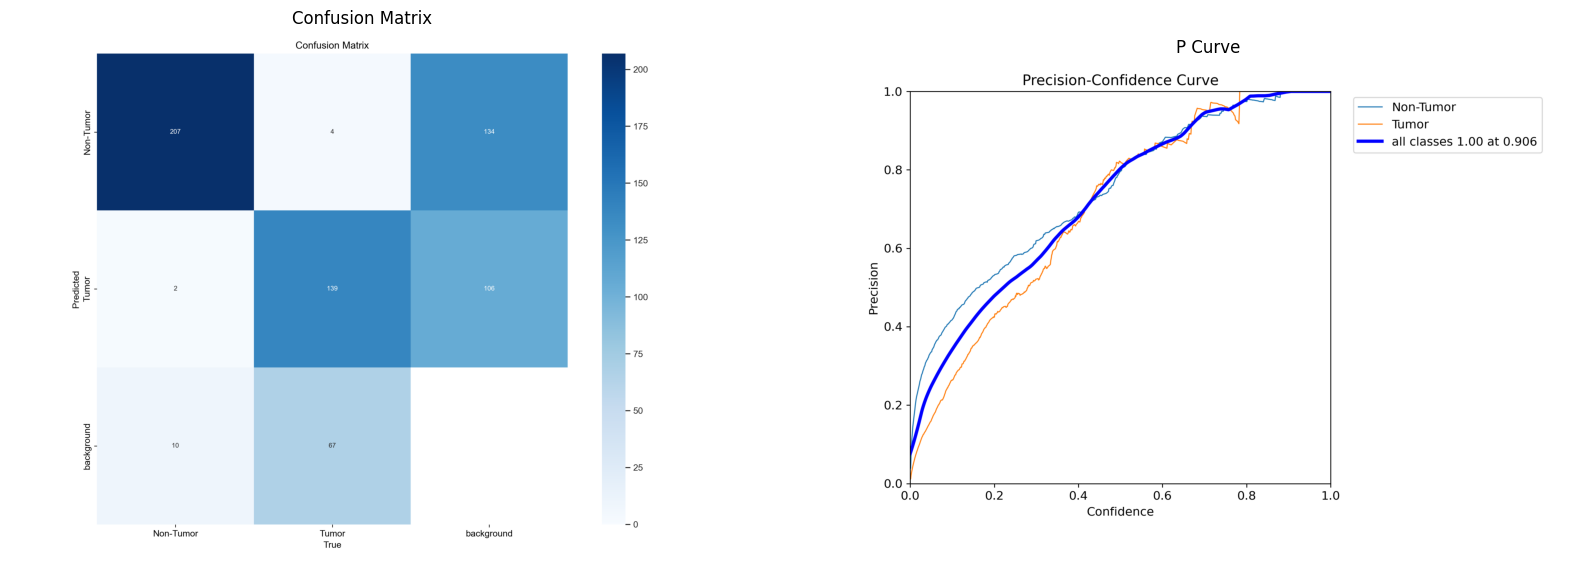

In [51]:
from PIL import Image

confusion_matrix_path = "/Users/preethapallavi/runs/detect/train/confusion_matrix.png"
P_curve_path = "/Users/preethapallavi/runs/detect/train/P_curve.png"

img1 = Image.open(confusion_matrix_path)
img2 = Image.open(P_curve_path)


fig, axes = plt.subplots(1, 2, figsize=(20, 10))  

#  (Confusion Matrix)
axes[0].imshow(img1)
axes[0].set_title('Confusion Matrix')  
axes[0].axis('off')  

#  (P Curve)
axes[1].imshow(img2)
axes[1].set_title('P Curve')  
axes[1].axis('off')  


plt.show()


#### Confusion matrix:
The model is good at finding most tumors (rarely misses them) but can be over cautious, sometimes mistaking healthy tissue for tumors (more false positives than true positives).



#### Precision-confidence curve:
The precision-confidence curve shows that as the model's confidence (X-axis) increases, the accuracy of its positive predictions (precision, Y-axis) also goes up.  However, there's a point (around 0.8 confidence) where further increases in confidence yield minimal benefit.

### To give you an overview, here is the images of brain used in training.

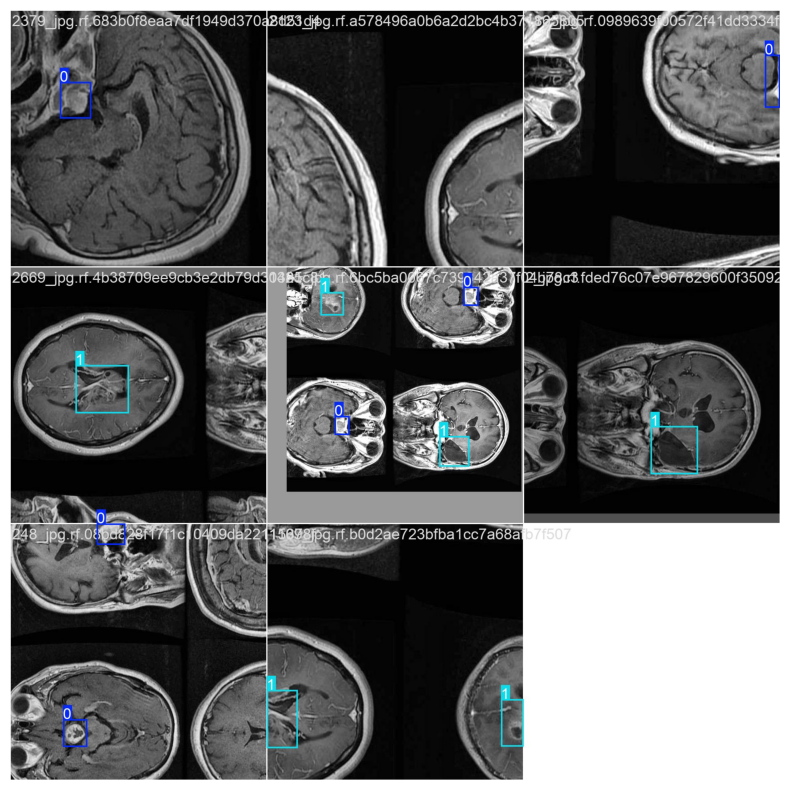

In [52]:
image_path = "/Users/preethapallavi/runs/detect/train/train_batch1.jpg"

image = cv2.imread(image_path)

# OpenCV usually reads images in BGR format
if image.ndim == 3 and image.shape[-1] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using imshow
plt.figure(figsize=(10, 10)) 
plt.imshow(image)
plt.axis('off')  

plt.show()

### Simlarly, here is the images of brain, model has made prediction on.

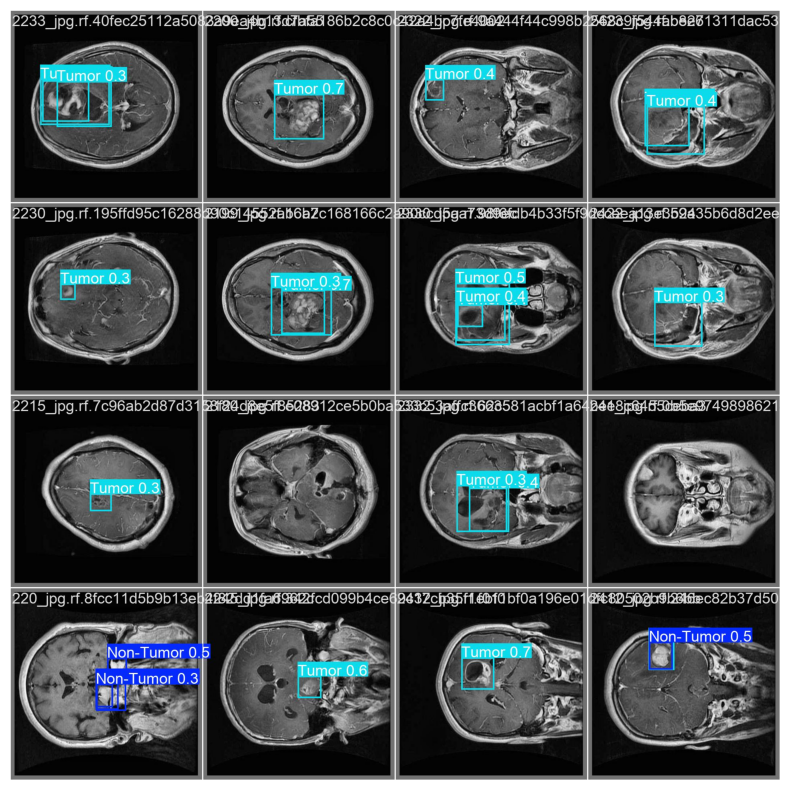

In [53]:
image_path = "/Users/preethapallavi/runs/detect/train/val_batch1_pred.jpg"

image = cv2.imread(image_path)

# OpenCV usually reads images in BGR format
if image.ndim == 3 and image.shape[-1] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using imshow
plt.figure(figsize=(10, 10))  
plt.imshow(image)
plt.axis('off')  

plt.show()

## Conclusion:
As from the prediction above we can see the model demonstrates high sensitivity in detecting tumors, minimizing the risk of missed cases. However, a tendency to over-predict tumors in healthy tissue exists.

To address this over-prediction, fine-tuning the YOLOv8 model can be beneficial. This process involves adjusting the model's training parameters to focus specifically on the task of tumor detection within the dataset